Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Machine failure
0    134281
1      2148
Name: count, dtype: int64
[[-5.42871712e-02  1.76910221e+00 -1.32918299e+00 -3.61140222e-01
   3.92640710e+00  8.23095923e-01  8.61055376e+00  8.73131456e+00
   9.94618302e+00  8.40533558e+00  6.73654073e-03]]
[-8.04398078]
Train set:
Accuracy: 0.9962
Precision: 0.9924
Recall: 0.7626

Test set:
Accuracy: 0.9962
Precision: 0.9912
Recall: 0.7671


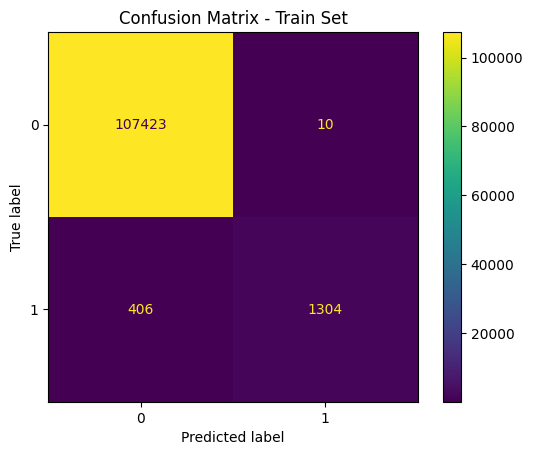

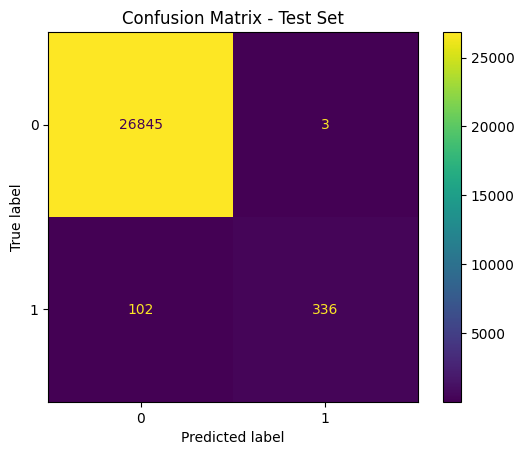

Initial Logistic Regression (Section 7):
Train Set:
Accuracy: 0.9962
Precision: 0.9924
Recall: 0.7626
Test Set:
Accuracy: 0.9962
Precision: 0.9912
Recall: 0.7671
Train set (without binary categories):
Accuracy: 0.9847
Precision: 0.7692
Recall: 0.0292

Test set (without binary categories):
Accuracy: 0.9842
Precision: 0.7692
Recall: 0.0228
Evaluating Decision Tree:
Best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10}
Accuracy: 0.9855
Evaluating Naive Bayes:
Best parameters: {'var_smoothing': 1e-09}
Accuracy: 0.9777
                                                                        Hyperparameters  \
Logistic Regression (Section 7)                                                       -   
Logistic Regression (Section 8)                                                       -   
Decision Tree (Section 9) - Config 1  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
Decision Tree (Section 9) - Config 2  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   

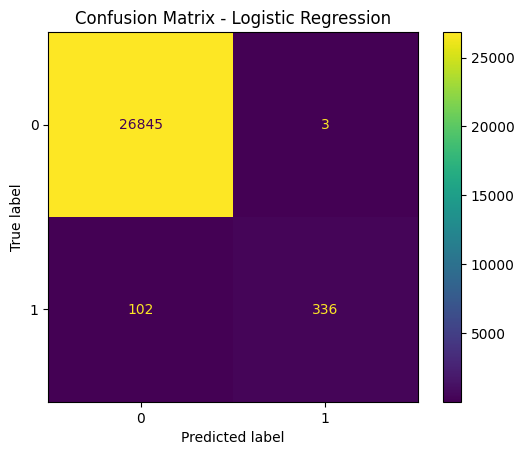

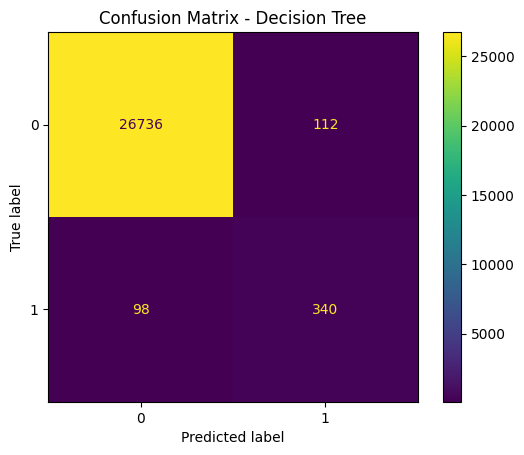

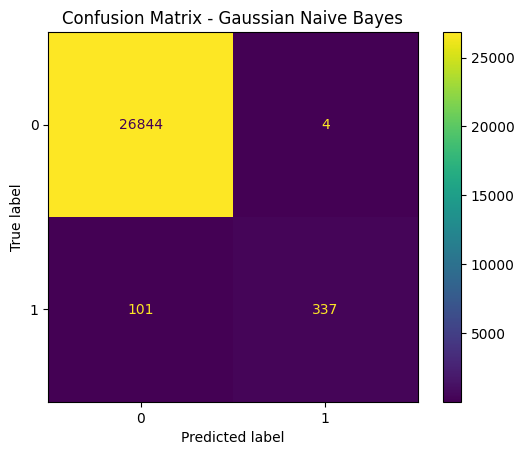


Evaluation Summary:
Model: Logistic Regression
Test Accuracy: 0.9962
Test Precision: 0.9912
Test Recall: 0.7671

Model: Decision Tree
Test Accuracy: 0.9923
Test Precision: 0.7522
Test Recall: 0.7763

Model: Gaussian Naive Bayes
Test Accuracy: 0.9962
Test Precision: 0.9883
Test Recall: 0.7694

Most important feature: PWF

Performance Comparison:
      Metric  Before Removal  After Removal
0   Accuracy        0.996152       0.994063
1  Precision        0.988270       0.985915
2     Recall        0.769406       0.639269


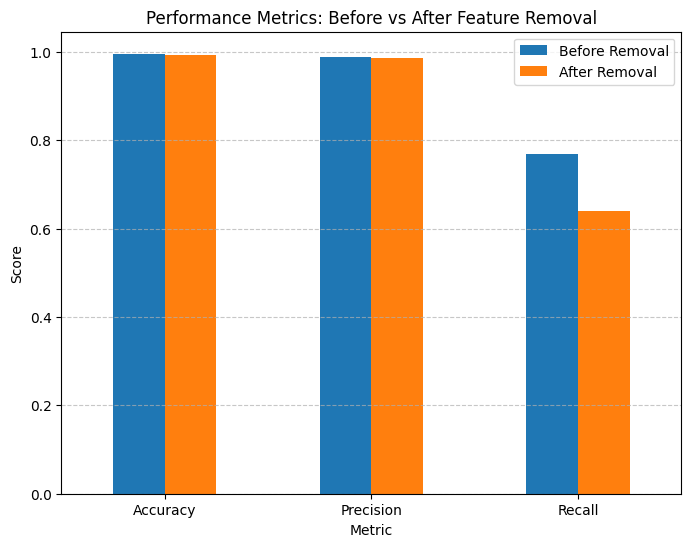

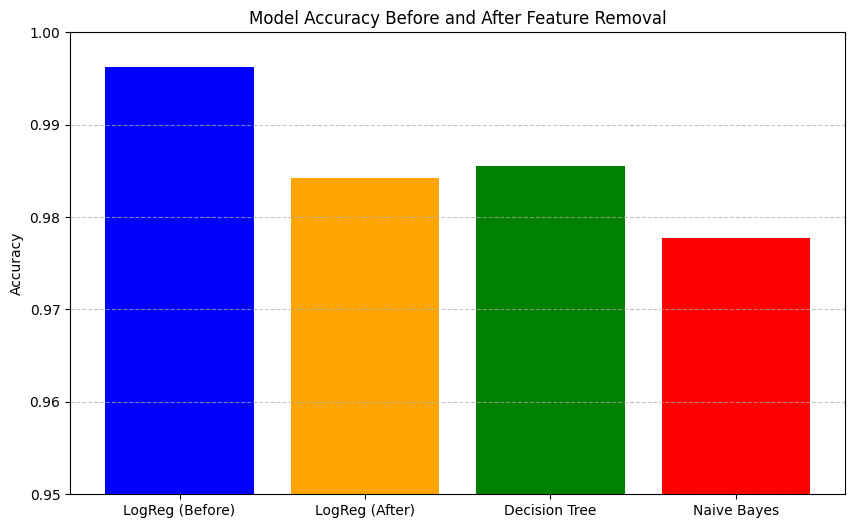

In [6]:
#By Or Adar and Dima Shpak
#305468506   &  321371320

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

#1. Mount drive
drive.mount('/content/drive')
train_df = pd.read_csv('/content/drive/MyDrive/data/train.csv')

#2. Remove ID and productID columns
train_df = train_df.drop(['id', 'Product ID'], axis=1)

#3. Machine failure listing of each class
class_counts = train_df['Machine failure'].value_counts()
print(class_counts)

#4. Convert categorial type to var
if not set(train_df['Type']).issubset({'H', 'M', 'L'}):
    raise ValueError("Unexpected values found in 'Type' column")

type_mapping = {'H': 0, 'M': 1, 'L': 2}
train_df['Type'] = train_df['Type'].map(type_mapping)
#5. Normalize the data
feature_columns = train_df.drop('Machine failure', axis=1).columns
scaler = MinMaxScaler()
scaler.fit(train_df[feature_columns])
normalized_features = scaler.transform(train_df[feature_columns])
normalized_df = pd.DataFrame(normalized_features, columns=feature_columns)
normalized_df['Machine failure'] = train_df['Machine failure']  # Add the target column back


# Define features (X) and target (y)
X = normalized_df.drop('Machine failure', axis=1)  # Features (all columns except 'Machine failure')
y = normalized_df['Machine failure']  # Target variable

#6. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#7. Regression model, create an object
model = LogisticRegression()
# Training and prediction
model = LogisticRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Store the predictions (add this line)
y_pred_lr_section7 = y_test_pred

#7.a Testing print to see coefficents of the equation
print(model.coef_)
print(model.intercept_)

#7.b  recall, precision,accuracy. Evolution score once on train once on test
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#Calculate the evo score
# Train set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, pos_label=1)
train_recall = recall_score(y_train, y_train_pred, pos_label=1)

# Test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, pos_label=1)
test_recall = recall_score(y_test, y_test_pred, pos_label=1)

#print results
print("Train set:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")

print("\nTest set:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")

# 7.c Calculate and display confusion matrix
# Train set
train_cm = confusion_matrix(y_train, y_train_pred)

# Test set
test_cm = confusion_matrix(y_test, y_test_pred)

# Display confusion matrix
# Train set
disp_train = ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=model.classes_)
disp_train.plot()
plt.title("Confusion Matrix - Train Set")
plt.show()

# Test set
disp_test = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=model.classes_)
disp_test.plot()
plt.title("Confusion Matrix - Test Set")
plt.show()

# After training the initial Logistic Regression model (model)
y_pred_train = model.predict(X_train)  # Predictions on the training set
y_pred_test = model.predict(X_test)  # Predictions on the testing set

# Calculate and print the metrics
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, pos_label=1)
recall_train = recall_score(y_train, y_pred_train, pos_label=1)

accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, pos_label=1)
recall_test = recall_score(y_test, y_pred_test, pos_label=1)

print("Initial Logistic Regression (Section 7):")
print("Train Set:")
print(f"Accuracy: {accuracy_train:.4f}")
print(f"Precision: {precision_train:.4f}")
print(f"Recall: {recall_train:.4f}")
print("Test Set:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")

# 8. Retraining without binary features
# a. Create new DataFrames
new_X_train = X_train.drop(['TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1)
new_X_test = X_test.drop(['TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1)

# b. Retrain the model
new_model = LogisticRegression()
new_model.fit(new_X_train, y_train)

# c. Predict
new_y_train_pred = new_model.predict(new_X_train)
new_y_test_pred = new_model.predict(new_X_test)

# d. Re-evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Train set
new_train_accuracy = accuracy_score(y_train, new_y_train_pred)
new_train_precision = precision_score(y_train, new_y_train_pred, pos_label=1)
new_train_recall = recall_score(y_train, new_y_train_pred, pos_label=1)

# Test set
new_test_accuracy = accuracy_score(y_test, new_y_test_pred)
new_test_precision = precision_score(y_test, new_y_test_pred, pos_label=1)
new_test_recall = recall_score(y_test, new_y_test_pred, pos_label=1)

# e. Print the re-evaluated metrics
print("Train set (without binary categories):")
print(f"Accuracy: {new_train_accuracy:.4f}")
print(f"Precision: {new_train_precision:.4f}")
print(f"Recall: {new_train_recall:.4f}")

print("\nTest set (without binary categories):")
print(f"Accuracy: {new_test_accuracy:.4f}")
print(f"Precision: {new_test_precision:.4f}")
print(f"Recall: {new_test_recall:.4f}")

# 9. Different models for the task (with Naive Bayes)
models = {
    "Decision Tree": (DecisionTreeClassifier(), {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10]
    }),
    "Naive Bayes": (GaussianNB(), {
        'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
    })
}
# Iterate through the models and configurations
for model_name, (model, param_grid) in models.items():
    print(f"Evaluating {model_name}:")

    # Perform GridSearchCV to find the best configuration
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='precision', n_jobs=-1)
    grid_search.fit(new_X_train, y_train)  # Use the modified training data

    # Get the best model and its predictions
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(new_X_test)  # Use the modified testing data

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)

    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy:.4f}")

# Store the accuracy results in a dictionary
results = {
    'Logistic Regression (Section 7)': {
        'Hyperparameters': '-',
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    },
    'Logistic Regression (Section 8)': {
        'Hyperparameters': '-',
        'Train Accuracy': new_train_accuracy,
        'Test Accuracy': new_test_accuracy
    }
}

# Iterate through the models from Section 9 and store their results
for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='precision', n_jobs=-1)
    grid_search.fit(new_X_train, y_train)

    # Get the top 4 configurations
    top_4_configs = sorted(grid_search.cv_results_['params'],
                            key=lambda x: grid_search.cv_results_['mean_test_score'][grid_search.cv_results_['params'].index(x)],
                            reverse=True)[:4]

    # Store results for the top 4 configurations
    for i, config in enumerate(top_4_configs):
        # create new model here for each configuration!!
        best_model = type(model)().set_params(**config)
        best_model.fit(new_X_train, y_train)
        y_pred = best_model.predict(new_X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[f"{model_name} (Section 9) - Config {i+1}"] = {
            'Hyperparameters': config,
            'Train Accuracy': best_model.score(new_X_train, y_train),
            'Test Accuracy': accuracy
        }

# Create the DataFrame from the results dictionary
df = pd.DataFrame.from_dict(results, orient='index')
print(df)

# Section 11: Confusion Matrices for Top 3 Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gaussian Naive Bayes": GaussianNB()
}

# Fit and evaluate each model
results = []
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)

    # Dynamically retrieve class labels
    class_labels = model.classes_ if hasattr(model, 'classes_') else np.unique(y_train)

    # Display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot()
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    # Evaluate metrics
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, pos_label=1, zero_division=0)
    test_recall = recall_score(y_test, y_test_pred, pos_label=1, zero_division=0)

    results.append((name, test_accuracy, test_precision, test_recall))

# Summary of metrics for all models
print("\nEvaluation Summary:")
for name, accuracy, precision, recall in results:
    print(f"Model: {name}")
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Test Precision: {precision:.4f}")
    print(f"Test Recall: {recall:.4f}\n")

#12 identifiy the most important para and retrain
# Ensure the logistic regression model is used
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 1: Identify the most important feature
coefficients = np.abs(model.coef_[0])  # Absolute values of the coefficients
most_important_feature_index = np.argmax(coefficients)  # Index of the feature with the highest absolute coefficient
most_important_feature = X.columns[most_important_feature_index]

print(f"Most important feature: {most_important_feature}")

# Step 2: Remove the most important feature
X_new = X.drop(columns=[most_important_feature])  # Drop the identified feature
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Step 3: Retrain the logistic regression model
model_new = LogisticRegression()
model_new.fit(X_train_new, y_train)
y_test_pred_new = model_new.predict(X_test_new)

# Step 4: Evaluate performance metrics
# Before feature removal
test_accuracy_before = accuracy_score(y_test, y_test_pred)
test_precision_before = precision_score(y_test, y_test_pred, pos_label=1)
test_recall_before = recall_score(y_test, y_test_pred, pos_label=1)

# After feature removal
test_accuracy_after = accuracy_score(y_test, y_test_pred_new)
test_precision_after = precision_score(y_test, y_test_pred_new, pos_label=1)
test_recall_after = recall_score(y_test, y_test_pred_new, pos_label=1)

# Step 5: Display results in a table
import pandas as pd

results = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall"],
    "Before Removal": [test_accuracy_before, test_precision_before, test_recall_before],
    "After Removal": [test_accuracy_after, test_precision_after, test_recall_after]
})

print("\nPerformance Comparison:")
print(results)

# Step 6: Visualize the results with a bar chart
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))
results.set_index("Metric").plot(kind='bar', ax=ax)
plt.title("Performance Metrics: Before vs After Feature Removal")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



#some visuals
import matplotlib.pyplot as plt
import pandas as pd

# Data for visualization
data = {
    "Model": ["LogReg (Before)", "LogReg (After)", "Decision Tree", "Naive Bayes"],
    "Accuracy": [0.9962, 0.9842, 0.9855, 0.9777],
    "Precision": [0.9912, 0.7692, None, None],
    "Recall": [0.7671, 0.0228, None, None]
}

df = pd.DataFrame(data)

# Plot accuracy
plt.figure(figsize=(10, 6))
plt.bar(df["Model"], df["Accuracy"], color=['blue', 'orange', 'green', 'red'])
plt.title("Model Accuracy Before and After Feature Removal")
plt.ylabel("Accuracy")
plt.ylim(0.95, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The most important feature is: PWF


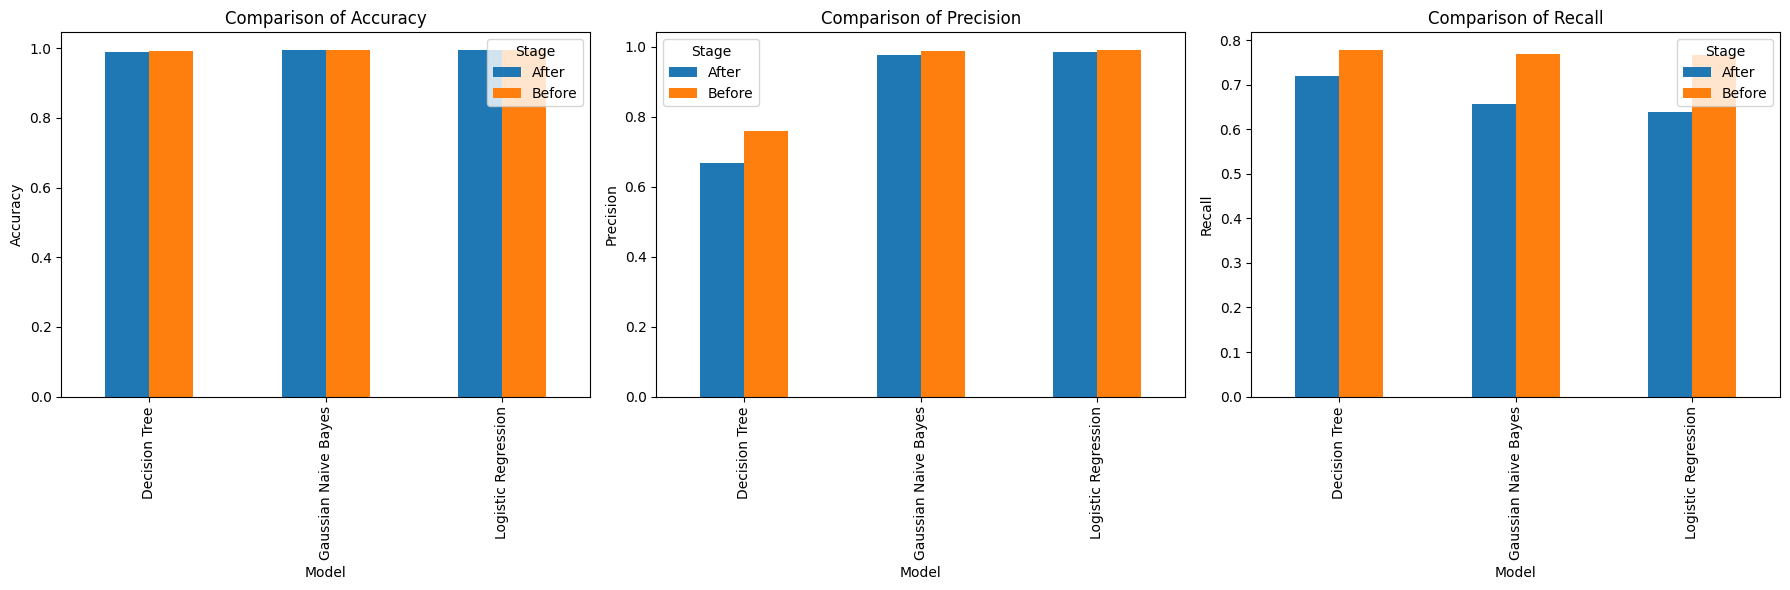

In [7]:
#12. Confusioin matrices of the best models.
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

# Step 1: Identify the most important feature using Logistic Regression coefficients
model = LogisticRegression()
model.fit(X_train, y_train)

# Get absolute values of coefficients and find the feature with the highest importance
feature_importance = np.abs(model.coef_[0])
most_important_feature = X_train.columns[np.argmax(feature_importance)]
print(f"The most important feature is: {most_important_feature}")

# Step 2: Remove the most important feature from the dataset
X_train_reduced = X_train.drop(columns=[most_important_feature])
X_test_reduced = X_test.drop(columns=[most_important_feature])

# Step 3: Retrain models and evaluate their performance
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gaussian Naive Bayes": GaussianNB()
}

results_before = []
results_after = []

# Function to evaluate a model and store results
def evaluate_model(name, model, X_train, X_test, y_train, y_test, results_list):
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, pos_label=1, zero_division=0)
    recall = recall_score(y_test, y_test_pred, pos_label=1, zero_division=0)
    results_list.append((name, accuracy, precision, recall))

# Evaluate models before removing the most important feature
for name, model in models.items():
    evaluate_model(name, model, X_train, X_test, y_train, y_test, results_before)

# Evaluate models after removing the most important feature
for name, model in models.items():
    evaluate_model(name, model, X_train_reduced, X_test_reduced, y_train, y_test, results_after)

# Step 4: Create a comparison table and visualization
# Combine results into a DataFrame
before_df = pd.DataFrame(results_before, columns=["Model", "Accuracy", "Precision", "Recall"])
before_df["Stage"] = "Before"

after_df = pd.DataFrame(results_after, columns=["Model", "Accuracy", "Precision", "Recall"])
after_df["Stage"] = "After"

comparison_df = pd.concat([before_df, after_df])

# Plot results for comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
metrics = ["Accuracy", "Precision", "Recall"]

for i, metric in enumerate(metrics):
    ax = axes[i]
    comparison_df.pivot(index="Model", columns="Stage", values=metric).plot(
        kind="bar", ax=ax, title=f"Comparison of {metric}"
    )
    ax.set_ylabel(metric)
    ax.set_xlabel("Model")
    ax.legend(title="Stage")
plt.tight_layout()
plt.show()
